# The Beta Distribution $ \beta $

Imagine you have something where the outcome is a probability, like:</br>

*   What's the probability this specific coin lands heads?
*   What percentage of voters in a town will vote for Candidate A?
*   What's the success rate of a new drug?

All these answers *must* be a number between 0 and 1 (or 0% and 100%).

**The Beta distribution is simply a way to describe your *belief* about what that unknown probability or percentage might be.**

Think of it like this:

### 1.  It Lives Between 0 and 1:

Just like probabilities, the Beta distribution only cares about numbers in the range [0, 1]. It won't give you answers like 1.5 or -0.2.</br>
### 2.  It Has a Shape:
Your belief might not be "I'm 100% sure the probability is exactly 0.6". Instead, you might think "It's *probably* around 0.6, but it could reasonably be 0.5 or 0.7 too". The Beta distribution gives your belief a *shape*.
### 3.  Two "Knobs" Control the Shape ($\alpha$ and $\beta$):


It has two parameters, often called Alpha ($ \alpha $) and Beta ($ \beta $). By changing these two numbers, you change the shape of your belief:</br>

*   **Flat Shape (Alpha=1, Beta=1):** If **you have absolutely <ins>no</ins> idea**, you might say all probabilities between 0 and 1 are equally likely. This looks like a flat line. This is the `Beta(1, 1)` or Uniform distribution we used as the prior.
*   **Peaked Shape (Alpha > 1, Beta > 1):** If you think the probability is likely around a certain value, the shape will have a peak there.
    *   If Alpha and Beta are equal (e.g., `Beta(10, 10)`), the peak is right in the middle at 0.5 (like believing a coin is fair). The higher the numbers, the *narrower* and more confident the peak.
    *   If Alpha is bigger than Beta (e.g., `Beta(10, 2)`), the peak is shifted towards 1 (like believing the coin is biased towards heads).
    *   If Beta is bigger than Alpha (e.g., `Beta(2, 10)`), the peak is shifted towards 0 (like believing the coin is biased towards tails).
## 4.  Simple Interpretation (Counts):

You can often think of Alpha and Beta like "counts":</br>
*   `Alpha` relates to the number of "successes" (like heads) you've seen or believe in.
*   `Beta` relates to the number of "failures" (like tails) you've seen or believe in.
*   So, `Beta(1, 1)` is like starting with having seen 1 imaginary head and 1 imaginary tail – no preference.
*   `Beta(11, 6)` could represent believing based on seeing 10 heads and 5 tails (you add 1 to each count for the parameters).

**Why is it useful (especially for the coin example)?**

*   **It naturally fits probabilities** (because it's defined from 0 to 1).
*   **It's flexible** (you can represent many different belief shapes).
*   **It updates easily:** When you get new data (like flipping the coin more times), there's a super simple rule to update your belief shape: just add the new heads to Alpha and the new tails to Beta! Your new belief is still a Beta distribution, just with updated knobs.

In short: **The Beta distribution is a flexible tool to represent your belief about an unknown probability (something between 0 and 1), and it's easy to update that belief when you get new evidence.**

---

## **Key Characteristics:**

1.  **Parameters:** It's characterized by two positive **shape parameters**, typically denoted as $ \alpha $ (alpha) and $ \beta $ (beta). So, we write $ \text{Beta}(\alpha, \beta) $.
    *   $ \alpha > 0 $
    *   $ \beta > 0 $

2.  **Probability Density Function (PDF):** The formula for the PDF is:
    $ f(x; \alpha, \beta) = \frac{1}{B(\alpha, \beta)} x^{\alpha-1} (1-x)^{\beta-1} $
    where:
    *   $ x $ is the variable (representing a probability, like our $ \theta $), with $ 0 \le x \le 1 $.
    *   $ \alpha $ and $ \beta $ are the shape parameters.
    *   $ B(\alpha, \beta) $ is the **Beta function** (which is different from the Beta *distribution*).

3.  **The Beta Function (as the Normalization Constant):** The term $ B(\alpha, \beta) $ in the denominator is the Beta function, which acts as a normalization constant. Its role is to ensure that the total area under the PDF curve equals 1 (a fundamental requirement for any probability distribution). The Beta function is defined as:
    $ B(\alpha, \beta) = \int_0^1 t^{\alpha-1} (1-t)^{\beta-1} dt $
    It can also be expressed using the Gamma function ($ \Gamma $), which is a generalization of the factorial function:
    $ B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)} $
    (You don't always need to compute this directly, especially when using software, but it's the underlying math).

4.  **Flexibility (Shape):** The key feature of the Beta distribution is its flexibility. By changing the values of $ \alpha $ and $ \beta $, you can achieve a wide variety of shapes for your probability distribution over [0, 1]:
    *   **Uniform:** If $ \alpha = 1, \beta = 1 $, the PDF is $ f(x; 1, 1) = 1 $ for $ x \in [0, 1] $. This means all values are equally likely (our "uninformative" prior).
    *   **Bell-shaped (Unimodal):** If $ \alpha > 1, \beta > 1 $, the distribution has a single peak somewhere between 0 and 1.
        *   If $ \alpha = \beta $, the peak is at 0.5 (e.g., belief in a fair coin).
        *   If $ \alpha > \beta $, the peak is closer to 1 (belief in a heads-biased coin).
        *   If $ \alpha < \beta $, the peak is closer to 0 (belief in a tails-biased coin).
    *   **U-shaped:** If $ 0 < \alpha < 1, 0 < \beta < 1 $, the distribution peaks at both 0 and 1, suggesting a belief that the probability is likely very close to either extreme.
    *   **J-shaped:** If one parameter is 1 and the other is greater than 1, or if one is less than 1 and the other is greater than or equal to 1.

5.  **Mean and Mode:**
    *   **Mean:** $ E[X] = \frac{\alpha}{\alpha + \beta} $
    *   **Mode (Peak Location):** $ \text{mode}[X] = \frac{\alpha - 1}{\alpha + \beta - 2} $ (defined for $ \alpha, \beta > 1 $)

---

## Why Use the Beta Distribution for the Coin Flip Prior?

There are several compelling reasons why the Beta distribution is the standard choice for representing the prior belief about a probability parameter (like the coin bias $ \theta $):

1.  **Domain Matching:** The most obvious reason. The parameter we are estimating, $ \theta $ (the probability of heads), must lie between 0 and 1. The Beta distribution is *defined* on exactly this interval [0, 1], making it a mathematically natural fit.

2.  **Conjugacy:** This is the most powerful statistical reason. The Beta distribution is the **conjugate prior** for the Binomial (and Bernoulli) likelihood function.
    *   **What does conjugate mean?** It means that **if you start with a prior belief expressed as a Beta distribution and then update this belief using data that follows a Binomial (or Bernoulli) likelihood, <ins>the resulting posterior distribution will *also* be a Beta distribution</ins>**.
    *   **Why is this good?**
        *   **Mathematical Simplicity:** The updating process becomes incredibly simple. Instead of performing complex integration to find the posterior, you just update the parameters of the Beta distribution using a simple rule: $ \alpha_{\text{posterior}} = \alpha_{\text{prior}} + \#\text{ successes} $ and $ \beta_{\text{posterior}} = \beta_{\text{prior}} + \#\text{ failures} $. This is exactly what we saw in the steps: $ \alpha_N = \alpha_0 + H $ and $ \beta_N = \beta_0 + (N-H) $.
        *   **Interpretability:** The posterior remains in the same family as the prior, making it easy to understand how the data has shifted our beliefs. The parameters $ \alpha $ and $ \beta $ can be intuitively thought of as representing "pseudo-counts" from the prior. $ \alpha_0 - 1 $ represents prior pseudo-heads, and $ \beta_0 - 1 $ represents prior pseudo-tails. The posterior parameters simply add the observed heads and tails to these pseudo-counts.

3.  **Flexibility:** As mentioned earlier, the Beta distribution can represent a wide range of prior beliefs through the choice of $ \alpha $ and $ \beta $. You can express strong prior belief (high $ \alpha, \beta $ values, leading to a narrow peak), weak prior belief (low $ \alpha, \beta $ values, like the uniform $ \text{Beta}(1, 1) $), or beliefs skewed towards fairness, heads, or tails. This allows the modeler to accurately encode their initial state of knowledge (or lack thereof).

In summary, the Beta distribution is used because its domain matches the parameter of interest, it offers mathematical convenience and interpretability through conjugacy with the binomial likelihood, and it's flexible enough to represent diverse prior beliefs.

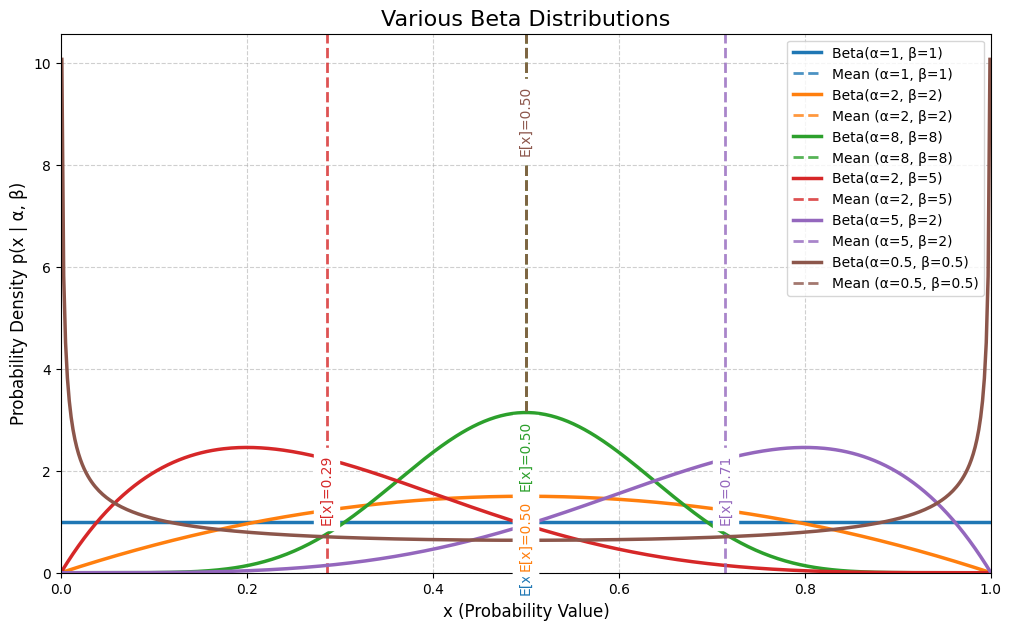

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define the range of x values (probabilities from 0 to 1)
# Avoid exact 0 and 1 for cases where alpha or beta < 1 (PDF goes to infinity)
x = np.linspace(0.001, 0.999, 500)

# --- Parameter Pairs to Plot ---
params = [
    (1, 1),     # Uniform (Flat)
    (2, 2),     # Symmetric, peaked at 0.5 (weakly confident fair coin)
    (8, 8),     # Symmetric, more peaked at 0.5 (more confident fair coin)
    (2, 5),     # Skewed towards 0 (belief in tails bias)
    (5, 2),     # Skewed towards 1 (belief in heads bias)
    (0.5, 0.5)  # U-shaped (belief concentrated near 0 and 1)
]

# --- Create the Plot ---
plt.figure(figsize=(12, 7))

for alpha_val, beta_val in params:
    # Calculate the PDF using scipy.stats.beta
    y = beta.pdf(x, alpha_val, beta_val)
    
    # Plot the PDF
    line, = plt.plot(x, y, label=f"Beta(α={alpha_val}, β={beta_val})", lw=2.5) # lw for linewidth

    # Calculate and plot the mean
    mean = alpha_val / (alpha_val + beta_val)
    plt.axvline(mean, color=line.get_color(), linestyle='--', lw=2, alpha=0.8,
                label=f"Mean (α={alpha_val}, β={beta_val})")
    # Add expected value as a text annotation
    plt.text(mean, max(y)*0.95, f"E[x]={mean:.2f}", color=line.get_color(),
             ha='center', va='top', fontsize=10, rotation=90, backgroundcolor='white')
    # plt.axvline(mean, color=line.get_color(), linestyle='--', lw=2, alpha=0.8)

# --- Customize the Plot ---
plt.title("Various Beta Distributions", fontsize=16)
plt.xlabel("x (Probability Value)", fontsize=12)
plt.ylabel("Probability Density p(x | α, β)", fontsize=12)

# Set axis limits - might need adjustment depending on peak heights
plt.xlim(0, 1)
plt.ylim(bottom=0, top=max(7, plt.ylim()[1])) # Ensure y starts at 0, adjust top if needed

plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# --- Show the Plot ---
plt.show()

### Explanation of the Plotted Shapes:

1.  **`Beta(1, 1)` (Blue):** This is the **Uniform distribution**. It's a flat line, indicating that before seeing any data, we believe all possible probability values from 0 to 1 are equally likely. This represents a state of maximum ignorance or impartiality. ($ \alpha=1, \beta=1 $ corresponds to 0 prior successes and 0 prior failures).

2.  **`Beta(2, 2)` (Orange):** This distribution is **symmetric and peaked at 0.5**. It suggests a belief that the probability is likely near 0.5 (like a fair coin), but with considerable uncertainty (the peak is wide). ($ \alpha=2, \beta=2 $ corresponds to 1 prior success and 1 prior failure).

3.  **`Beta(8, 8)` (Green):** Also **symmetric and peaked at 0.5**, but much narrower and taller than `Beta(2, 2)`. This represents a *stronger* belief that the probability is very close to 0.5. The higher values of $ \alpha $ and $ \beta $ indicate more "prior evidence" (like 7 prior successes and 7 prior failures).

4.  **`Beta(2, 5)` (Red):** This distribution is **asymmetric, skewed towards 0**. The peak is below 0.5 ($ \text{mode} = (\alpha-1)/(\alpha+\beta-2) = (2-1)/(2+5-2) = 1/5 = 0.2 $). This represents a prior belief that the probability is likely low (e.g., the coin is biased towards tails). ($ \alpha=2, \beta=5 $ corresponds to 1 prior success and 4 prior failures).

5.  **`Beta(5, 2)` (Purple):** This is the mirror image of the previous one, **asymmetric and skewed towards 1**. The peak is above 0.5 ($ \text{mode} = (5-1)/(5+2-2) = 4/5 = 0.8 $). This represents a prior belief that the probability is likely high (e.g., the coin is biased towards heads). ($ \alpha=5, \beta=2 $ corresponds to 4 prior successes and 1 prior failure).

6.  **`Beta(0.5, 0.5)` (Brown):** This is a **U-shaped distribution**. It has peaks near 0 and 1, and a dip in the middle. This represents a belief that the probability is likely to be extreme – either very low or very high, but unlikely to be moderate (e.g., believing the coin is almost certainly *not* fair, but unsure if it's heads- or tails-biased). This type of prior is less common but illustrates the flexibility of the Beta distribution.

These plots show how changing $ \alpha $ and $ \beta $ allows the Beta distribution to capture a wide variety of beliefs about an unknown probability.